# **Credit Card Fraud Detection**

**Problem**

In recent times, many people moved to digital life for purchasing, and people prefer using credit/ debit cards for making transactions. Cyber attackers are misusing features like credit limits. As technology advances, new methods of cyber-attacks are emerging. This has become a significant problem in the modern era, as all transactions can be quickly completed online by only entering your credit card information.

**Approach using machine Learning:**   


When we talk about security in digital life, the main challenge is to find fraudulent activity. Fraud detection is a set of actions taken to prevent money from being accessed illegally. In this project, we use three machine learning algorithms to perform classifications of abnormal activities. Algorithms track the patterns of transactions, and if they find anything fraudulent in the transaction, it should abort the transaction. We use Accuracy, Precision, Recall, and F1 score as deciding factors to choose which algorithm is the best fit for this data.

**Dataset:**

We are using a dataset from [kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud .

This dataset contains transactions made by credit cards in September 2013 by European cardholders. We have 30 features and one final class column. 

Here dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. 

The dataset is highly unbalanced; it has positive class (frauds) account for 0.172% of all transactions.
It contains only numerical input variables, which are the result of a PCA transformation.

**Importing the Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
# loading the dataset to a Pandas DataFrame
path="/content/creditcard.csv"
ccData = pd.read_csv(path)

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Exploratory Data Analysis

In [ ]:
ccData.shape

(284807, 31)

In [ ]:
# first 5 rows of the dataset
ccData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
ccData.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
# dataset informations
ccData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# checking the number of missing values in each column
ccData.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
ccData['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

0 --> Normal Transaction

1 --> fraudulent transaction

In [ ]:
ccData.drop_duplicates(inplace=True)

**Removing Duplicate Transactions**

Duplicates are a type of nonrandom sampling that can cause your fitted model to be biased. By include them, the model will basically overfit this subset of points. So, we will remove all duplicate transactions. 

In [ ]:
# distribution of legit transactions & fraudulent transactions
ccData['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

Credict Card data set had 284807 transactions initially, after removing the duplicates the data set has 283726

This Dataset is highly imblanced

<function matplotlib.pyplot.show>

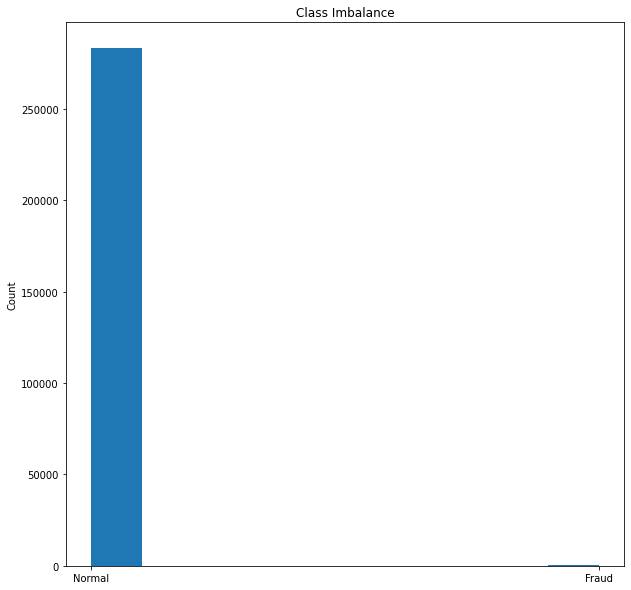

In [ ]:
labels = ["Normal", "Fraud"]
plt.figure(figsize=(10, 10))
ccData['Class'].plot(kind = "hist",rot = 0)
plt.title("Class Imbalance")
plt.ylabel("Count")
plt.xticks(range(2),labels)
plt.show

In [ ]:
# separating the data for analysis
normal = ccData[ccData.Class == 0]
fraud = ccData[ccData.Class == 1]

In [ ]:
print(normal.shape)
print(fraud.shape)

(283253, 31)
(473, 31)


In [ ]:
# statistical measures of the data
normal.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
# compare the values for both transactions
ccData.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,0.007663,-0.006004,0.009476,0.000762,0.011668,0.001166,0.007845,0.010963,0.005120,-0.001382,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,3.716347,-6.103254,-0.094324,-6.835946,-0.072830,-4.000956,-6.463285,-2.157071,0.669143,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


## Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 473

In [ ]:
sampled_normal = normal.sample(n=473)

**Concatenating two DataFrames**

In [ ]:
ccData_new = pd.concat([sampled_normal, fraud], axis=0)

In [ ]:
ccData_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
260187,159439.0,1.881871,-0.541252,-0.499981,0.281753,-0.527654,-0.154844,-0.533912,0.102951,1.123839,-0.000238,0.377294,0.793615,-0.405667,0.243681,0.046906,0.556866,-0.935301,0.526667,0.381210,-0.136528,-0.136546,-0.406164,0.265420,-0.548818,-0.429818,-0.615595,0.018409,-0.038406,54.99,0
266640,162429.0,1.981755,-0.057954,-1.575109,0.651920,0.017679,-0.976474,0.032693,-0.155742,0.591757,-0.283778,0.961973,0.611663,-0.793032,-0.873518,-1.192726,0.061807,0.728056,0.512051,0.200749,-0.212564,0.115210,0.586219,-0.019035,0.050118,0.143134,0.701920,-0.061679,-0.053802,11.50,0
216629,140560.0,1.957805,-0.004561,-0.598457,1.651737,-0.122223,-0.439972,0.067012,-0.196397,0.923728,-0.041209,-1.233183,1.425432,0.988570,-0.498211,-1.899239,-0.908108,0.096479,-1.063030,0.284541,-0.230069,-0.323489,-0.463102,0.221123,0.048912,0.101535,-0.826025,0.047895,-0.040642,5.90,0
144803,86413.0,0.199528,0.792993,-0.379225,-0.752744,1.167080,-0.244669,1.004115,-0.079156,0.020412,-0.435552,0.702329,-0.177982,-1.147721,-0.823223,-0.720783,0.524114,0.024046,0.394611,0.108233,0.048568,-0.363704,-0.815724,0.043073,0.157244,-0.488020,0.092922,0.048400,-0.154272,10.25,0
135608,81326.0,1.161816,-0.347241,-0.666423,0.448316,1.762486,4.082172,-0.849765,1.027016,0.741867,-0.163610,-0.849958,0.399287,-0.253607,-0.269139,-0.762405,-0.196328,-0.337084,0.013205,0.466249,0.013374,-0.148846,-0.307228,-0.161128,1.027731,0.835135,-0.275210,0.053437,0.024200,37.00,0


In [ ]:
ccData_new.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.491140,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
ccData_new['Class'].value_counts()

1    473
0    473
Name: Class, dtype: int64

<function matplotlib.pyplot.show>

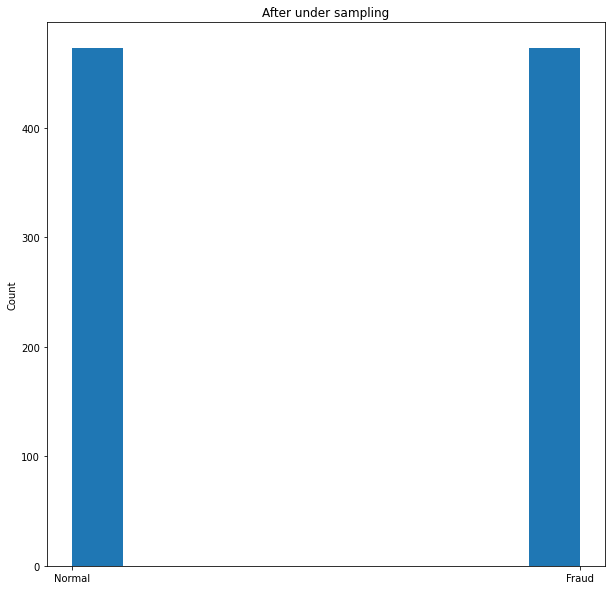

In [ ]:
labels = ["Normal", "Fraud"]
plt.figure(figsize=(10, 10))
ccData_new['Class'].plot(kind = "hist",rot = 0)
plt.title("After under sampling")
plt.ylabel("Count")
plt.xticks(range(2),labels)
plt.show

In [ ]:
ccData_new.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,93032.116279,-0.249472,-0.032515,0.035572,-0.056372,-0.022896,0.024532,0.056299,-0.056846,-0.031713,-0.018107,0.046898,0.041617,-0.004688,0.016321,-0.017638,0.010358,0.024676,0.012738,-0.018653,-0.059714,0.001757,0.053134,0.062024,-0.023057,0.009448,-0.043968,0.020249,-0.01773,92.723636
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,3.716347,-6.103254,-0.094324,-6.835946,-0.072830,-4.000956,-6.463285,-2.157071,0.669143,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.07827,123.871860


## Splitting the data into Features & Targets

In [ ]:
X = ccData_new.drop(columns='Class', axis=1)
Y = ccData_new['Class']

In [ ]:
print(X)

            Time        V1        V2  ...       V27       V28  Amount
260187  159439.0  1.881871 -0.541252  ...  0.018409 -0.038406   54.99
266640  162429.0  1.981755 -0.057954  ... -0.061679 -0.053802   11.50
216629  140560.0  1.957805 -0.004561  ...  0.047895 -0.040642    5.90
144803   86413.0  0.199528  0.792993  ...  0.048400 -0.154272   10.25
135608   81326.0  1.161816 -0.347241  ...  0.053437  0.024200   37.00
...          ...       ...       ...  ...       ...       ...     ...
279863  169142.0 -1.927883  1.125653  ...  0.292680  0.147968  390.00
280143  169347.0  1.378559  1.289381  ...  0.389152  0.186637    0.76
280149  169351.0 -0.676143  1.126366  ...  0.385107  0.194361   77.89
281144  169966.0 -3.113832  0.585864  ...  0.884876 -0.253700  245.00
281674  170348.0  1.991976  0.158476  ...  0.002988 -0.015309   42.53

[946 rows x 30 columns]


In [ ]:
print(Y)

260187    0
266640    0
216629    0
144803    0
135608    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 946, dtype: int64


## Split the data into Training data & Testing Data

To model a general case, we have split our existing data into training and testing sets where 20% of the data is set to test and 80% of data is used to train the model. 

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=16)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(946, 30) (756, 30) (190, 30)


**Feature Scaling**

We first standardize the data since otherwise a feature with high variation may bias or dictate the distance functions etc. Thus, we use StandardScaler that centers the data (by subtracting the mean of data) and make the variance 1 (by dividing by variance) to ensure that no single feature is dominating its functioning. 

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## Model Training

**Logisitc Regression**

Logistic regression is a widely used discriminative classification model. Since our data has binary classification, we are going to use Binary Logistic Regression. To predict the target variable classes, Binary Logistic Regression Classification uses one or more predictor variables that can be either continuous or categorical. This technique aids in the identification of important features(Xi) that influence the target variable (Y), as well as the nature of the relationships between these features and the dependent variable.

In [ ]:
model = LogisticRegression()

In [ ]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation

In [ ]:
# accuracy on training data
train_pred = model.predict(X_train)
acc_train = accuracy_score(train_pred, Y_train)

In [ ]:
print('Accuracy on Training data : ', acc_train)

Accuracy on Training data :  0.9537037037037037


In [ ]:
# accuracy on test data
Y_pred = model.predict(X_test)
acc = accuracy_score(Y_pred, Y_test)*100

In [ ]:
print('Accuracy score on Test Data : ', acc)

Accuracy score on Test Data :  94.21052631578948


In [ ]:
rec = recall_score(Y_pred, Y_test)*100
print('Recall score on Test Data : ', rec)

Recall score on Test Data :  95.87628865979381


In [ ]:
f1 = f1_score(Y_pred, Y_test)*100
print('F1 score on Test Data : ', f1)

F1 score on Test Data :  94.41624365482232


In [ ]:
prec = precision_score(Y_pred,Y_test)*100
print('Precision on Test Data : ', prec)

Precision on Test Data :  93.0


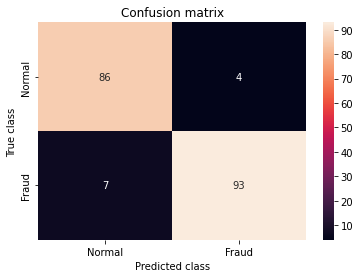

In [ ]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test,Y_pred)
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Out of 90 normal transactions, logistic regression model predicted 86 of them correctly and 4 of them wrong. Out of 100 fraudulant transactions, logistic regression model predicted 93 of them correctly and 7 of them wrong. In conclusion logistic regression model classified 176 data points correctly out of 190.

**Random Forest Classifier**

A random forest is a supervised machine learning system that uses decision tree algorithms to build it. Many decision trees make up a random forest algorithm. Bagging or bootstrap aggregation are used to train the 'forest' formed by the random forest method. Bagging is a meta-algorithm that increases the accuracy of machine learning methods by grouping them together. The  algorithm determines the outcome based on decision tree predictions. It forecasts by averaging the output of various trees.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth = 4)
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_test)

In [ ]:
rf_acc = accuracy_score(rf_pred, Y_test)*100
print('Accuracy score on Test Data : ', rf_acc)

Accuracy score on Test Data :  94.73684210526315


In [ ]:
rf_rec = recall_score(rf_pred, Y_test)*100
print('Recall score on Test Data : ', rf_rec)

Recall score on Test Data :  98.91304347826086


In [ ]:
rf_prec = precision_score(rf_pred, Y_test)*100
print('Precision score on Test Data : ', rf_prec)

Precision score on Test Data :  91.0


In [ ]:
rf_f1 = f1_score(rf_pred, Y_test)*100
print('F1 score on Test Data : ', rf_f1)

F1 score on Test Data :  94.79166666666667


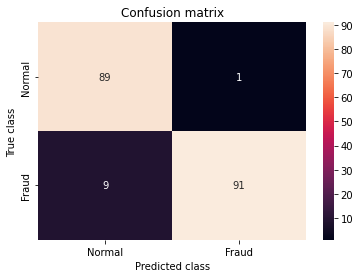

In [ ]:
rfCM = confusion_matrix(Y_test, rf_pred)
sns.heatmap(rfCM, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Out of 90 normal and 100 fraud transactions, Random forest model predicted 89 normal transactions and 91 fraud transactions correclty. In conclusion Random forest model predicts 178 data points correctly out of 190.

**K-nearest Neighbours Classifier**

k-NN is a supervised algorithm used to solve classification problems. In K-NN, the data point of interest (unseen, unlabelled data) is assigned a class based on the class of the k closest known data points around it. The value of k determines how many neighboring points we consider in order to determine its class (based on the majority class value of k points nearest to the point). The main crux of this algorithm is to find the optimized values for the k parameter. Too large or too small of a value will produce incorrect results since the former may bias the data against classes with fewer samples while the latter will make the model susceptible to outliers.

In our case, we have plotted a graph of the values of mean error encountered using different values of k (form 1 to 40). In our case, k=8 gives the least mean error (maximum accuracy) so hence we go ahead with that.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, Y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Mean Error')

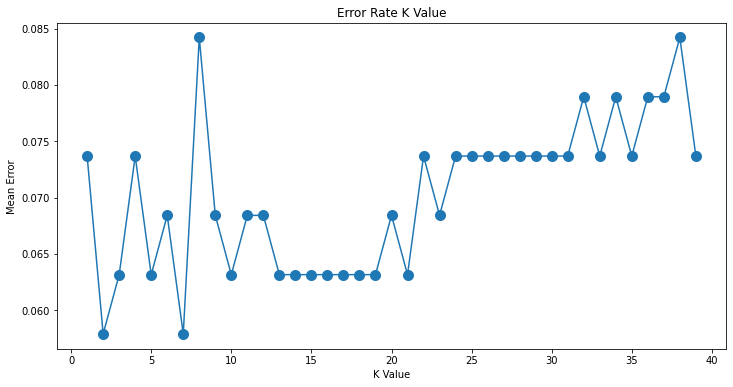

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, marker='o', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, Y_train)
knn_pred = classifier.predict(X_test)

In [ ]:
knn_acc = accuracy_score(knn_pred, Y_test)*100
print('Accuracy score on Test Data : ', knn_acc)

Accuracy score on Test Data :  94.21052631578948


In [ ]:
knn_rec = recall_score(knn_pred, Y_test)*100
print('Recall score on Test Data : ', knn_rec)

Recall score on Test Data :  96.84210526315789


In [ ]:
knn_prec = precision_score(knn_pred, Y_test)*100
print('Precision score on Test Data : ', knn_prec)

Precision score on Test Data :  92.0


In [ ]:
knn_f1 = f1_score(knn_pred, Y_test)*100
print('F1 score on Test Data : ', knn_f1)

F1 score on Test Data :  94.35897435897436


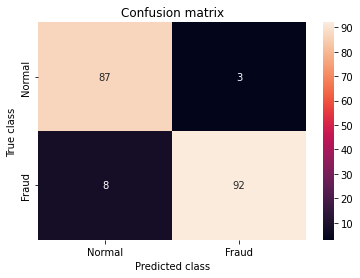

In [ ]:
knnCM = confusion_matrix(Y_test, knn_pred)
sns.heatmap(knnCM, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Out of 90 normal transactions and 100 fraud transactions, KNN model predicted 87 of normal transactions and 92 of fraud transactions correctly. In conclusion KNN model classified 178 data points correctly out of 190.

# Results

In [ ]:
comp = {'Algorithm': ['Logistic Regression', 'K-Nearest Neighbours', 'Random Forest'], 
        'Accuracy': [acc,knn_acc,rf_acc],
        'Recall': [rec, knn_rec, rf_rec],
        'Precision': [prec, knn_prec, rf_prec],
        'F1 Score': [f1,knn_f1,rf_f1]} 

In [ ]:
df = pd.DataFrame(comp)  
df

,Algorithm,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,94.210526,95.876289,93.0,94.416244
1,K-Nearest Neighbours,94.210526,96.842105,92.0,94.358974
2,Random Forest,94.736842,98.913043,91.0,94.791667


# Conclusion

In this project, we have tested three different algorithms i.e, Logistic Regression,  K-nearest neighbors and Random Forest to predict the nature of a credit card transaction. After training and testing the the three models, we observed that all of them performed equally well, but Random forest preformed better in few aspects.